In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import os

path= "Datasets/yelp-dataset/"
print(os.listdir(path))

['Dataset_Challenge_Dataset_Agreement.pdf', 'yelp_business.csv', 'yelp_business_attributes.csv', 'yelp_business_hours.csv', 'yelp_checkin.csv', 'yelp_review.csv', 'yelp_tip.csv', 'yelp_user.csv']


In [12]:
print(path)

Datasets/yelp-dataset/


In [13]:
review = pd.read_csv(path+"yelp_review.csv", header=0, skiprows=range(0, 0), nrows=50)
# user = pd.read_csv(path+"yelp_user.csv")
# tip = pd.read_csv(path+"yelp_tip.csv")
# checkin = pd.read_csv(path+"yelp_checkin.csv")
# business = pd.read_csv(path+"yelp_business.csv")
# business_attribute = pd.read_csv(path+"yelp_business_attributes.csv")
# business_hours = pd.read_csv(path+"yelp_business_hours.csv")
# business_hours = pd.read_csv(path+"yelp_business_hours.csv")



print(review)
# business_hours.describe()

                 review_id                 user_id             business_id  \
0   vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1   n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2   MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3   IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4   L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   
5   HRPm3vEZ_F-33TYVT7Pebw  _4iMDXbXZ1p1ONG297YEAQ  8QWPlVQ6D-OExqXoaD2Z1g   
6   ymAUG8DZfQcFTBSOiaNN4w  u0LXt3Uea_GidxRW1xcsfg  9_CGhHMz8698M9-PkVf0CQ   
7   8UIishPUD92hXtScSga_gw  u0LXt3Uea_GidxRW1xcsfg  gkCorLgPyQLsptTHalL61g   
8   w41ZS9shepfO3uEyhXEWuQ  u0LXt3Uea_GidxRW1xcsfg  5r6-G9C4YLbC7Ziz57l3rQ   
9   WF_QTN3p-thD74hqpp2j-Q  u0LXt3Uea_GidxRW1xcsfg  fDF_o2JPU8BR1Gya--jRIA   
10  PIsUSmvaUWB00qv5KTF1xA  u0LXt3Uea_GidxRW1xcsfg  z8oIoCT1cXz7gZP5GeU5OA   
11  PdZ_uFjbbkjtm3SCY_KrZw  u0LXt3Uea_GidxRW1xcsfg  XWTPNfskXoUL

In [15]:
review.columns.tolist()

['review_id',
 'user_id',
 'business_id',
 'stars',
 'date',
 'text',
 'useful',
 'funny',
 'cool']

In [5]:
import seaborn as sns

In [6]:
review.describe()

,stars,useful,funny,cool
count,50.000000,50.000000,50.000000,50.000000
mean,3.500000,1.060000,0.220000,0.340000
std,1.129385,2.333518,0.815413,0.823383
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,0.000000,0.000000
max,5.000000,11.000000,5.000000,5.000000


In [7]:
def basic_details(df):
    print('Row:{0} Column:{1}'.format(df.shape[0], df.shape[1]))
    d = pd.DataFrame()
    d['Number of unique'] = df.nunique()
    d['Number of missing'] = df.isnull().sum()
    d['Datatype'] = df.dtypes
    
    return d

In [46]:
details_frame = basic_details(review)
print(details_frame)

Row:50 Column:9
             Number of unique  Number of missing Datatype
review_id                  50                  0   object
user_id                     3                  0   object
business_id                50                  0   object
stars                       5                  0    int64
date                       34                  0   object
text                       50                  0   object
useful                      9                  0    int64
funny                       4                  0    int64
cool                        4                  0    int64


In [36]:
review.nunique()

review_id      50
user_id         3
business_id    50
stars           5
date           34
text           50
useful          8
funny           4
cool            4
dtype: int64

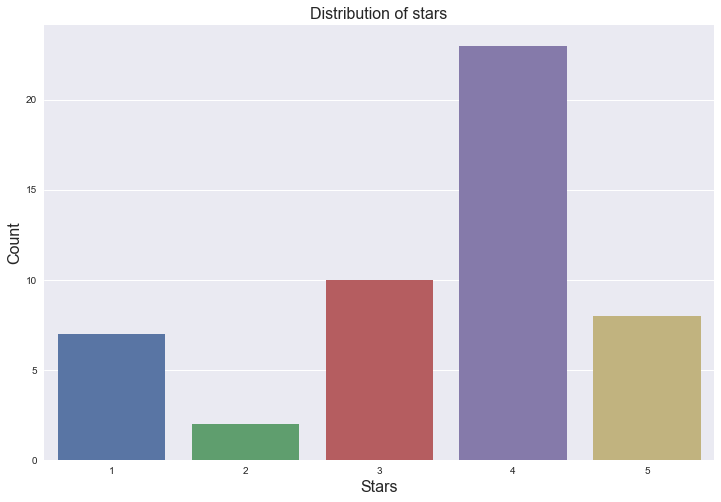

In [56]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.countplot(x=review['stars'])
plt.ylabel("Count",fontsize=16)
plt.xlabel("Stars",fontsize=16)
plt.title('Distribution of stars', fontsize=16)
plt.savefig('distibution_of_stars.png')

上面的只是开胃小菜，下面将使用聚类算法对上面的评论按照内容进行聚类，计划分成5个簇，最后将分簇的统计结果和实际所在簇进行对比，判断聚类的效果。

## 进行K-means算法简单聚类

In [10]:
import nltk
from nltk.corpus import stopwords 

In [11]:
# 载入nltk中的英文体用词作为“stopwords”
stop_words=stopwords.words('english')
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [12]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')   # 词干化（将英文单词变成原型）

In [13]:
# 分词，即断句
tmp_text = review.text[:10]


In [14]:
print(tmp_text[0])

Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. 

Staff was very helpful and friendly.


In [15]:
nltk.sent_tokenize(tmp_text[0])

['Super simple place but amazing nonetheless.',
 "It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.",
 'Staff was very helpful and friendly.']

In [16]:
len(stop_words)

179

In [17]:
type(review)

pandas.core.frame.DataFrame

In [18]:
type(review)==pd.core.frame.DataFrame

True

In [19]:
details_frame

,Number of unique,Number of missing,Datatype
review_id,50,0,object
user_id,3,0,object
business_id,50,0,object
stars,5,0,int64
date,34,0,object
text,50,0,object
useful,8,0,int64
funny,4,0,int64
cool,4,0,int64


In [20]:
details_frame.iloc[0, 0]

50

In [34]:
type(details_frame.iloc[0, 2])

numpy.dtype

In [26]:
details_frame.iloc[0, 2]

numpy.dtype

In [27]:
details_frame.iloc[0, 2] ==np.dtype

True

In [28]:
details_frame.iloc[0, 1] ==np.dtype

False

In [31]:
type(details_frame.iloc[3, 1] )

numpy.int64

In [33]:
type(details_frame.iloc[3, 1])==np.int64

True

In [35]:
details_frame.dtypes

Number of unique      int64
Number of missing     int64
Datatype             object
dtype: object

In [41]:
import time
print(time.time())
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

import datetime
i = datetime.datetime.now()
print ("当前的日期和时间是 %s" % i)
print ("ISO格式的日期和时间是 %s" % i.isoformat() )
print ("当前的年份是 %s" %i.year)
print ("当前的月份是 %s" %i.month)
print ("当前的日期是  %s" %i.day)
print ("dd/mm/yyyy 格式是  %s/%s/%s" % (i.day, i.month, i.year) )
print ("当前小时是 %s" %i.hour)
print ("当前分钟是 %s" %i.minute)
print ("当前秒是  %s" %i.second)

1539519371.736606
2018-10-14 20:16:11
当前的日期和时间是 2018-10-14 20:16:11.737596
ISO格式的日期和时间是 2018-10-14T20:16:11.737596
当前的年份是 2018
当前的月份是 10
当前的日期是  14
dd/mm/yyyy 格式是  14/10/2018
当前小时是 20
当前分钟是 16
当前秒是  11


In [42]:
range(0, 0)

range(0, 0)

In [43]:
print(range(0, 0))

range(0, 0)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


obj=pd.Series(['c','a','d','a','a','b','b','c','c','c'])
# print(obj.unique())
count={}
for i in obj:
#     print(type(i))
#     break
#     print(i)
    if i not in count.keys():
        count[i] =1
    else:
        count[i]+=1

for k in count.keys():
    print(k, count[k])

c 4
a 3
d 1
b 2


In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [10]:
import time 

st=time.time()
for i in range(5):
    time.sleep(1)
    
et=time.time()
print(et-st)

5.002461671829224
